In [1]:
import numpy as np
import mylibrary.nnlib as tnn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import copy

matplotlib.rcParams['figure.figsize'] = (12, 8)

#### Dataset 0

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

#### Dataset 1

In [3]:
# x1min, x1max, nx1 = -5, 4, 75
# x2min, x2max, nx2 = -3, 7, 75
# x1, x2 = np.linspace(x1min, x1max, nx1), np.linspace(x2min, x2max, nx2)
# X1, X2 = np.meshgrid(x1, x2)

# def gaussian(x1, x2, x10, x20, x1alpha, x2alpha, A):
#     return A * np.exp( -((x1-x10)/x1alpha)**2 -((x2-x20)/x2alpha)**2)

# gprms = [(0, 2, 2.5, 5.4, 1.5),
#          (-1, 4, 6, 2.5, 1.8),
#          (-3, -0.5, 1, 2, 4),
#          (3, 0.5, 2, 1, 5)
#         ]
# Y = np.zeros(X1.shape)
# for p in gprms:
#     Y += gaussian(X1, X2, *p)

#### Scaling/Plotting the data

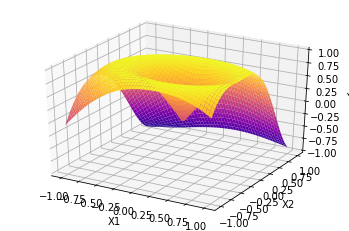

In [4]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [5]:
xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

optimizer = tnn.Adam(learning_rate=0.01)

## Sigmoid choose from two linear

In [6]:
prob = tnn.LinearLayer(2,1,optimizer=optimizer)
sigmoid = tnn.Sigmoid()
linear0 = tnn.LinearLayer(2,1, optimizer=optimizer)
linear1 = tnn.LinearLayer(2,1, optimizer=optimizer)

In [7]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    pout = prob.forward(xx)
    sout = sigmoid.forward(pout)
    
    l0 = linear0.forward(xx)
    l1 = linear1.forward(xx)
    
    y0 = (1-sout)*l0
    y1 = sout*l1
    yout = y0 + y1
    
    dy = yout - yy
    dy0 = dy
    dy1 = dy
    
    dl0 = dy0*(1-sout)
    dl1 = dy1*sout
    
    dx0 = linear0.backward(dl0)
    dx1 = linear1.backward(dl1)
    
    dsout = -dy0*l0+ dy1*l1
    dpout = sigmoid.backward(dsout)
    
    dxp = prob.backward(dpout)
    
    dx = dxp+dx0+dx1

    prob.update()
    linear0.update()
    linear1.update()
    
    
    if epoch%100 == 0:
        
#         norm = np.linalg.norm(prob.weights)
        norm = np.linalg.norm(np.concatenate((prob.weights,prob.bias[np.newaxis,...])))
        factor = np.exp(epoch/1000)/norm
        prob.weights = prob.weights * factor
        
        prob.bias = prob.bias*factor#/2

#         prob.weights = prob.weights * np.exp(10)/norm
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        
#         linexx = pout#np.zeros_like(pout)
#         linexx = linexx - prob.bias
#         linexx = linexx@np.linalg.pinv(prob.weights)
#         ax.scatter(linexx[:,0], linexx[:,1], np.zeros_like(yout.reshape(-1)), color='r', marker='.')
        
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  1.8142672040923637


100 Error =  0.2014478113305605


200 Error =  0.11604506755161406


300 Error =  0.0954741296288002


400 Error =  0.07677359657958112


500 Error =  0.06291453436567915


600 Error =  0.05464222029753466


700 Error =  0.050045938462495325


800 Error =  0.04733093443332207


900 Error =  0.04550976081936022


1000 Error =  0.04418124638399837


1100 Error =  0.04320346404664403


1200 Error =  0.04251543845341696


1300 Error =  0.04206853320489844


1400 Error =  0.04180094848109722


1500 Error =  0.04160718362326059


1600 Error =  0.04127415784388097


1700 Error =  0.04043238192276039


1800 Error =  0.03892848327146532


1900 Error =  0.03752083921536339


2000 Error =  0.036745590542602756


2100 Error =  0.03636553213599612


2200 Error =  0.03617143244146007


2300 Error =  0.0360945726048374


2400 Error =  0.03611214113543354


2500 Error =  0.03620824836229795


2600 Error =  0.03636392510268653


2700 Error =  0.036555650835530876


2800 

/media/tsuman/98D2644AD2642EA6/Neural_Network/Notebooks/Experimentals/NN_Func_Approx/DecisionTree/mylibrary/nnlib.py:142: RuntimeWarning: overflow encountered in exp
  self.out = 1 / (1 + np.exp(-x))




7200 Error =  0.0374656798922006


7300 Error =  0.037468546214728324


7400 Error =  0.037471286876019645


7500 Error =  0.037473837364662255


7600 Error =  0.03747613943687073


7700 Error =  0.03747814927807305


7800 Error =  0.03747984297640445


7900 Error =  0.037481218395459294


8000 Error =  0.03748229338182819


8100 Error =  0.0374831011179431


8200 Error =  0.0374836839942591


8300 Error =  0.03748408745274552


8400 Error =  0.03748435491508413


8500 Error =  0.03748452437123583


8600 Error =  0.037484626688160404


8700 Error =  0.03748468534087767


8800 Error =  0.037484717106374764


8900 Error =  0.03748473326127158


9000 Error =  0.0374847409199483


9100 Error =  0.03748474427582779


9200 Error =  0.0374847456219326


9300 Error =  0.03748474611096408


9400 Error =  0.03748474627000748


9500 Error =  0.03748474631572904


9600 Error =  0.03748474632718959


9700 Error =  0.03748474632965746


9800 Error =  0.03748474633010667


9900 Error =  0.037484746

TclError: invalid command name "pyimage23"

In [8]:
prob.weights, prob.bias

(array([[  101732.16836051],
        [-1013015.68426048]]), array([384115.76998954]))

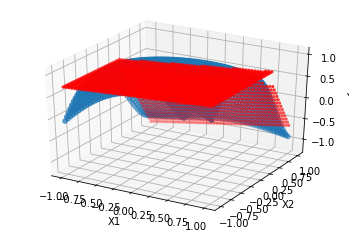

In [9]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()